<a href="https://colab.research.google.com/github/Karame12/Projects/blob/main/Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bayes Classifier

In [ ]:
# Importing Data:
import pandas as pd
claims = pd.read_csv('Car_Insurance_Claim.csv')

In [ ]:
claims.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,ANNUAL_MILEAGE_INDICATOR
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0,1
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0,0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0,0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0,0


In [ ]:
# Creating Dummy Variables:

In [ ]:
claims["ANNUAL_MILEAGE_INDICATOR"] = 1*(claims["ANNUAL_MILEAGE"] >= 12500)

In [ ]:
claims["VEHICLE_TYPE_INDICATOR"] = 1*(claims["VEHICLE_TYPE"] == 'sports car')

In [ ]:
claims["SPEEDING_VIOLATIONS_INDICATOR"] = 1*(claims["SPEEDING_VIOLATIONS"] >= 1)

In [ ]:
claims["PAST_ACCIDENTS_INDICATOR"] = 1*(claims["PAST_ACCIDENTS"] >= 1)

In [ ]:
claims

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,...,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,ANNUAL_MILEAGE_INDICATOR,VEHICLE_TYPE_INDICATOR,SPEEDING_VIOLATIONS_INDICATOR,PAST_ACCIDENTS_INDICATOR
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,...,12000.0,sedan,0,0,0,0.0,0,0,0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,...,16000.0,sedan,0,0,0,1.0,1,0,0,0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,...,11000.0,sedan,0,0,0,0.0,0,0,0,0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,...,11000.0,sedan,0,0,0,0.0,0,0,0,0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,...,12000.0,sedan,2,0,1,1.0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,...,16000.0,sedan,0,0,1,0.0,1,0,0,1
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,...,NaN,sedan,1,0,0,0.0,0,0,1,0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,...,14000.0,sedan,0,0,0,0.0,1,0,0,0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,...,13000.0,sedan,2,0,1,1.0,1,0,1,1


In [ ]:
# Splitting Data into Train and Test
train_claims = claims.sample(frac = 0.5, random_state = 0)
test_claims = claims.drop(train_claims.index)

In [ ]:
# Classification Matrix:
cars = pd.crosstab(train_claims['OUTCOME'], train_claims['SPEEDING_VIOLATIONS_INDICATOR'])
print(cars)
print('Proportion that survived')

SPEEDING_VIOLATIONS_INDICATOR     0     1
OUTCOME                                  
0.0                            1246  2208
1.0                            1218   328
Proportion that survived


In [ ]:
# Classification Matrix by Variable:
predictor_variables = ["VEHICLE_OWNERSHIP", "MARRIED", "ANNUAL_MILEAGE_INDICATOR", "VEHICLE_TYPE_INDICATOR", "SPEEDING_VIOLATIONS_INDICATOR", "PAST_ACCIDENTS_INDICATOR"]
for variable in predictor_variables:
  table = pd.crosstab(train_claims_cat['OUTCOME'], train_claims_cat[variable])
  print(table)
  print('Proportion that survived')
  print('      ' + variable + ' = 1: '+ str(table.at[1,1]/(table.at[0,1]+table.at[1,1])))
  print('      ' + variable + ' = 0: '+ str(table.at[1,0]/(table.at[0,0]+table.at[1,0])))
  print()

VEHICLE_OWNERSHIP  0.0   1.0
OUTCOME                     
0.0                607  2847
1.0                864   682
Proportion that survived
      VEHICLE_OWNERSHIP = 1: 0.19325587985264947
      VEHICLE_OWNERSHIP = 0: 0.5873555404486743

MARRIED   0.0   1.0
OUTCOME            
0.0      1391  2063
1.0      1070   476
Proportion that survived
      MARRIED = 1: 0.18747538400945254
      MARRIED = 0: 0.43478260869565216

ANNUAL_MILEAGE_INDICATOR     0     1
OUTCOME                             
0.0                       2419  1035
1.0                        837   709
Proportion that survived
      ANNUAL_MILEAGE_INDICATOR = 1: 0.4065366972477064
      ANNUAL_MILEAGE_INDICATOR = 0: 0.2570638820638821

VEHICLE_TYPE_INDICATOR     0    1
OUTCOME                          
0.0                     3293  161
1.0                     1482   64
Proportion that survived
      VEHICLE_TYPE_INDICATOR = 1: 0.28444444444444444
      VEHICLE_TYPE_INDICATOR = 0: 0.31036649214659684

SPEEDING_VIOLATIONS_IND

In [ ]:
train_claims_cat_1 = train_claims[["VEHICLE_OWNERSHIP", "MARRIED", "ANNUAL_MILEAGE_INDICATOR", "VEHICLE_TYPE_INDICATOR", "SPEEDING_VIOLATIONS_INDICATOR", "PAST_ACCIDENTS_INDICATOR", "OUTCOME"]]
test_claims_cat_1 = test_claims[["VEHICLE_OWNERSHIP", "MARRIED", "ANNUAL_MILEAGE_INDICATOR", "VEHICLE_TYPE_INDICATOR", "SPEEDING_VIOLATIONS_INDICATOR", "PAST_ACCIDENTS_INDICATOR", "OUTCOME"]]

In [ ]:
# The Classification of the First Observation in the Test Data:
test_claims_cat_1.head(1)

,VEHICLE_OWNERSHIP,MARRIED,ANNUAL_MILEAGE_INDICATOR,VEHICLE_TYPE_INDICATOR,SPEEDING_VIOLATIONS_INDICATOR,PAST_ACCIDENTS_INDICATOR,OUTCOME
0,1.0,0.0,0,0,0,0,0.0


In [ ]:
first_matches_112 = train_claims_cat_1[(train_claims_cat_1['VEHICLE_OWNERSHIP'] == 1) & (train_claims_cat_1['MARRIED'] == 0) & (train_claims_cat_1['ANNUAL_MILEAGE_INDICATOR'] == 0) & (train_claims_cat_1['SPEEDING_VIOLATIONS_INDICATOR'] == 0) & (train_claims_cat_1['PAST_ACCIDENTS_INDICATOR'] == 0)]

In [ ]:
print(first_matches_112)

      VEHICLE_OWNERSHIP  MARRIED  ANNUAL_MILEAGE_INDICATOR  \
898                 1.0      0.0                         0   
7883                1.0      0.0                         0   
6718                1.0      0.0                         0   
6798                1.0      0.0                         0   
1559                1.0      0.0                         0   
...                 ...      ...                       ...   
1528                1.0      0.0                         0   
5776                1.0      0.0                         0   
1165                1.0      0.0                         0   
8878                1.0      0.0                         0   
3851                1.0      0.0                         0   

      VEHICLE_TYPE_INDICATOR  SPEEDING_VIOLATIONS_INDICATOR  \
898                        0                              0   
7883                       0                              0   
6718                       0                              0   
679

In [ ]:
first_matches = train_claims_cat[(train_claims_cat['VEHICLE_OWNERSHIP'] == 1) & (train_claims_cat['MARRIED'] == 0) & (train_claims_cat['ANNUAL_MILEAGE_INDICATOR'] == 0) & (train_claims_cat['SPEEDING_VIOLATIONS_INDICATOR'] == 1) & (train_claims_cat['PAST_ACCIDENTS_INDICATOR'] == 1)]

Text(0.5, 1.0, 'Histogram of Status for matches to the first test instance')

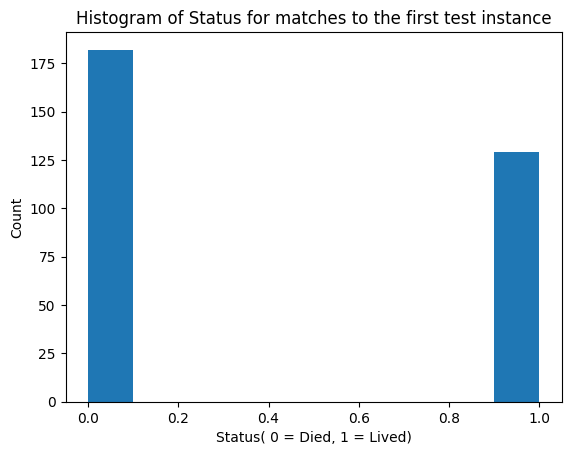

In [ ]:
import matplotlib.pyplot as plt

plt.hist(first_matches_112['OUTCOME'])
plt.xlabel('Status( 0 = Died, 1 = Lived)')
plt.ylabel('Count')
plt.title('Histogram of Status for matches to the first test instance')

In [ ]:
train_predictor_vars = train_claims_cat_1[["VEHICLE_OWNERSHIP", "MARRIED", "ANNUAL_MILEAGE_INDICATOR", "VEHICLE_TYPE_INDICATOR", "SPEEDING_VIOLATIONS_INDICATOR", "PAST_ACCIDENTS_INDICATOR"]]


In [ ]:
# Fitting the Naive Bayes Classifier
from sklearn.naive_bayes import CategoricalNB
est = CategoricalNB()
model = est.fit(train_predictor_vars, train_claims_cat_1["OUTCOME"])

In [ ]:
#Isolate the predictor variables in the test set:
test_predictor_vars = test_claims_cat_1[["VEHICLE_OWNERSHIP", "MARRIED", "ANNUAL_MILEAGE_INDICATOR", "VEHICLE_TYPE_INDICATOR", "SPEEDING_VIOLATIONS_INDICATOR", "PAST_ACCIDENTS_INDICATOR"]]


#Male classifications:
classifications = model.predict(test_predictor_vars)

#First test instance classification:
classifications[0]


1.0

In [ ]:
# Classfication Matrix
data = {'Actual': test_claims_cat_1['OUTCOME'],
        'Predictions': classifications}

df = pd.DataFrame(data)
pd.crosstab(df['Actual'], df['Predictions'])

Predictions,0.0,1.0
Actual,,
0.0,2734,679
1.0,483,1104


In [ ]:
# Model Assessment (Accuracy Rate):
class_matrix = pd.crosstab(df['Actual'], df['Predictions'])
(class_matrix.at[0,0] + class_matrix.at[1,1]) / len(test_claims_cat)


0.7676

In [ ]:
# Model Deployment
new_data = {'VEHICLE_OWNERSHIP': [0],
            'MARRIED': [1],
            'ANNUAL_MILEAGE_INDICATOR': [1],
            'VEHICLE_TYPE_INDICATOR': [1],
            'SPEEDING_VIOLATIONS_INDICATOR': [1],
            'PAST_ACCIDENTS_INDICATOR': [0]}

new_patient = pd.DataFrame(new_data)
model.predict(new_patient)


array([0.])